# Friedman example with different values of $m$, $\alpha$ and $\beta$

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pymc_bart as pmb
from pymc_bart.pgbart import compute_prior_probability

In [2]:
RANDOM_SEED = 4579
np.random.seed(RANDOM_SEED)
az.style.use("arviz-white")
plt.rcParams["figure.dpi"] = 300

## Data generation

In [3]:
X = np.random.uniform(low=0, high=1.0, size=(100, 10))
f_x = (
    10 * np.sin(np.pi * X[:, 0] * X[:, 1])
    + 20 * (X[:, 2] - 0.5) ** 2
    + 10 * X[:, 3]
    + 5 * X[:, 4]
)
Y = np.random.normal(f_x, 1)

In [4]:
trees = [10, 20, 50, 100, 200]
alphas = [0.1, 0.45, 0.95]
betas = [1, 2, 10]

idatas_at = {
    "10": {
        "0.1": {"1": {}, "2": {}, "10": {}},
        "0.45": {"1": {}, "2": {}, "10": {}},
        "0.95": {"1": {}, "2": {}, "10": {}},
    },
    "20": {
        "0.1": {"1": {}, "2": {}, "10": {}},
        "0.45": {"1": {}, "2": {}, "10": {}},
        "0.95": {"1": {}, "2": {}, "10": {}},
    },
    "50": {
        "0.1": {"1": {}, "2": {}, "10": {}},
        "0.45": {"1": {}, "2": {}, "10": {}},
        "0.95": {"1": {}, "2": {}, "10": {}},
    },
    "100": {
        "0.1": {"1": {}, "2": {}, "10": {}},
        "0.45": {"1": {}, "2": {}, "10": {}},
        "0.95": {"1": {}, "2": {}, "10": {}},
    },
    "200": {
        "0.1": {"1": {}, "2": {}, "10": {}},
        "0.45": {"1": {}, "2": {}, "10": {}},
        "0.95": {"1": {}, "2": {}, "10": {}},
    },
}
m_trees = {
    "10": {
        "0.1": {"1": {}, "2": {}, "10": {}},
        "0.45": {"1": {}, "2": {}, "10": {}},
        "0.95": {"1": {}, "2": {}, "10": {}},
    },
    "20": {
        "0.1": {"1": {}, "2": {}, "10": {}},
        "0.45": {"1": {}, "2": {}, "10": {}},
        "0.95": {"1": {}, "2": {}, "10": {}},
    },
    "50": {
        "0.1": {"1": {}, "2": {}, "10": {}},
        "0.45": {"1": {}, "2": {}, "10": {}},
        "0.95": {"1": {}, "2": {}, "10": {}},
    },
    "100": {
        "0.1": {"1": {}, "2": {}, "10": {}},
        "0.45": {"1": {}, "2": {}, "10": {}},
        "0.95": {"1": {}, "2": {}, "10": {}},
    },
    "200": {
        "0.1": {"1": {}, "2": {}, "10": {}},
        "0.45": {"1": {}, "2": {}, "10": {}},
        "0.95": {"1": {}, "2": {}, "10": {}},
    },
}

In [5]:
for m in trees:
    for alpha in alphas:
        for beta in betas:
            with pm.Model() as model:
                μ = pmb.BART("μ", X, Y, m=m, alpha=alpha, beta=beta)
                σ = pm.HalfNormal("σ", 1)
                y = pm.Normal("y", μ, σ, observed=Y)
                idata = pm.sample(
                    chains=4,
                    compute_convergence_checks=False,
                    idata_kwargs={"log_likelihood": True},
                    random_seed=RANDOM_SEED,
                )
                idatas_at[str(m)][str(alpha)][str(beta)] = idata
                m_trees[str(m)][str(alpha)][str(beta)] = μ.owner.op.all_trees

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 7 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 6 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 6 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 9 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 8 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 8 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 7 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 8 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 17 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 15 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 13 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 15 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 15 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 20 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 20 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 20 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 38 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 34 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 29 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 28 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 27 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 27 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 37 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 38 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 37 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 75 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 66 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 55 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 52 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 53 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 53 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 74 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 73 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 72 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 147 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 128 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 107 seconds.


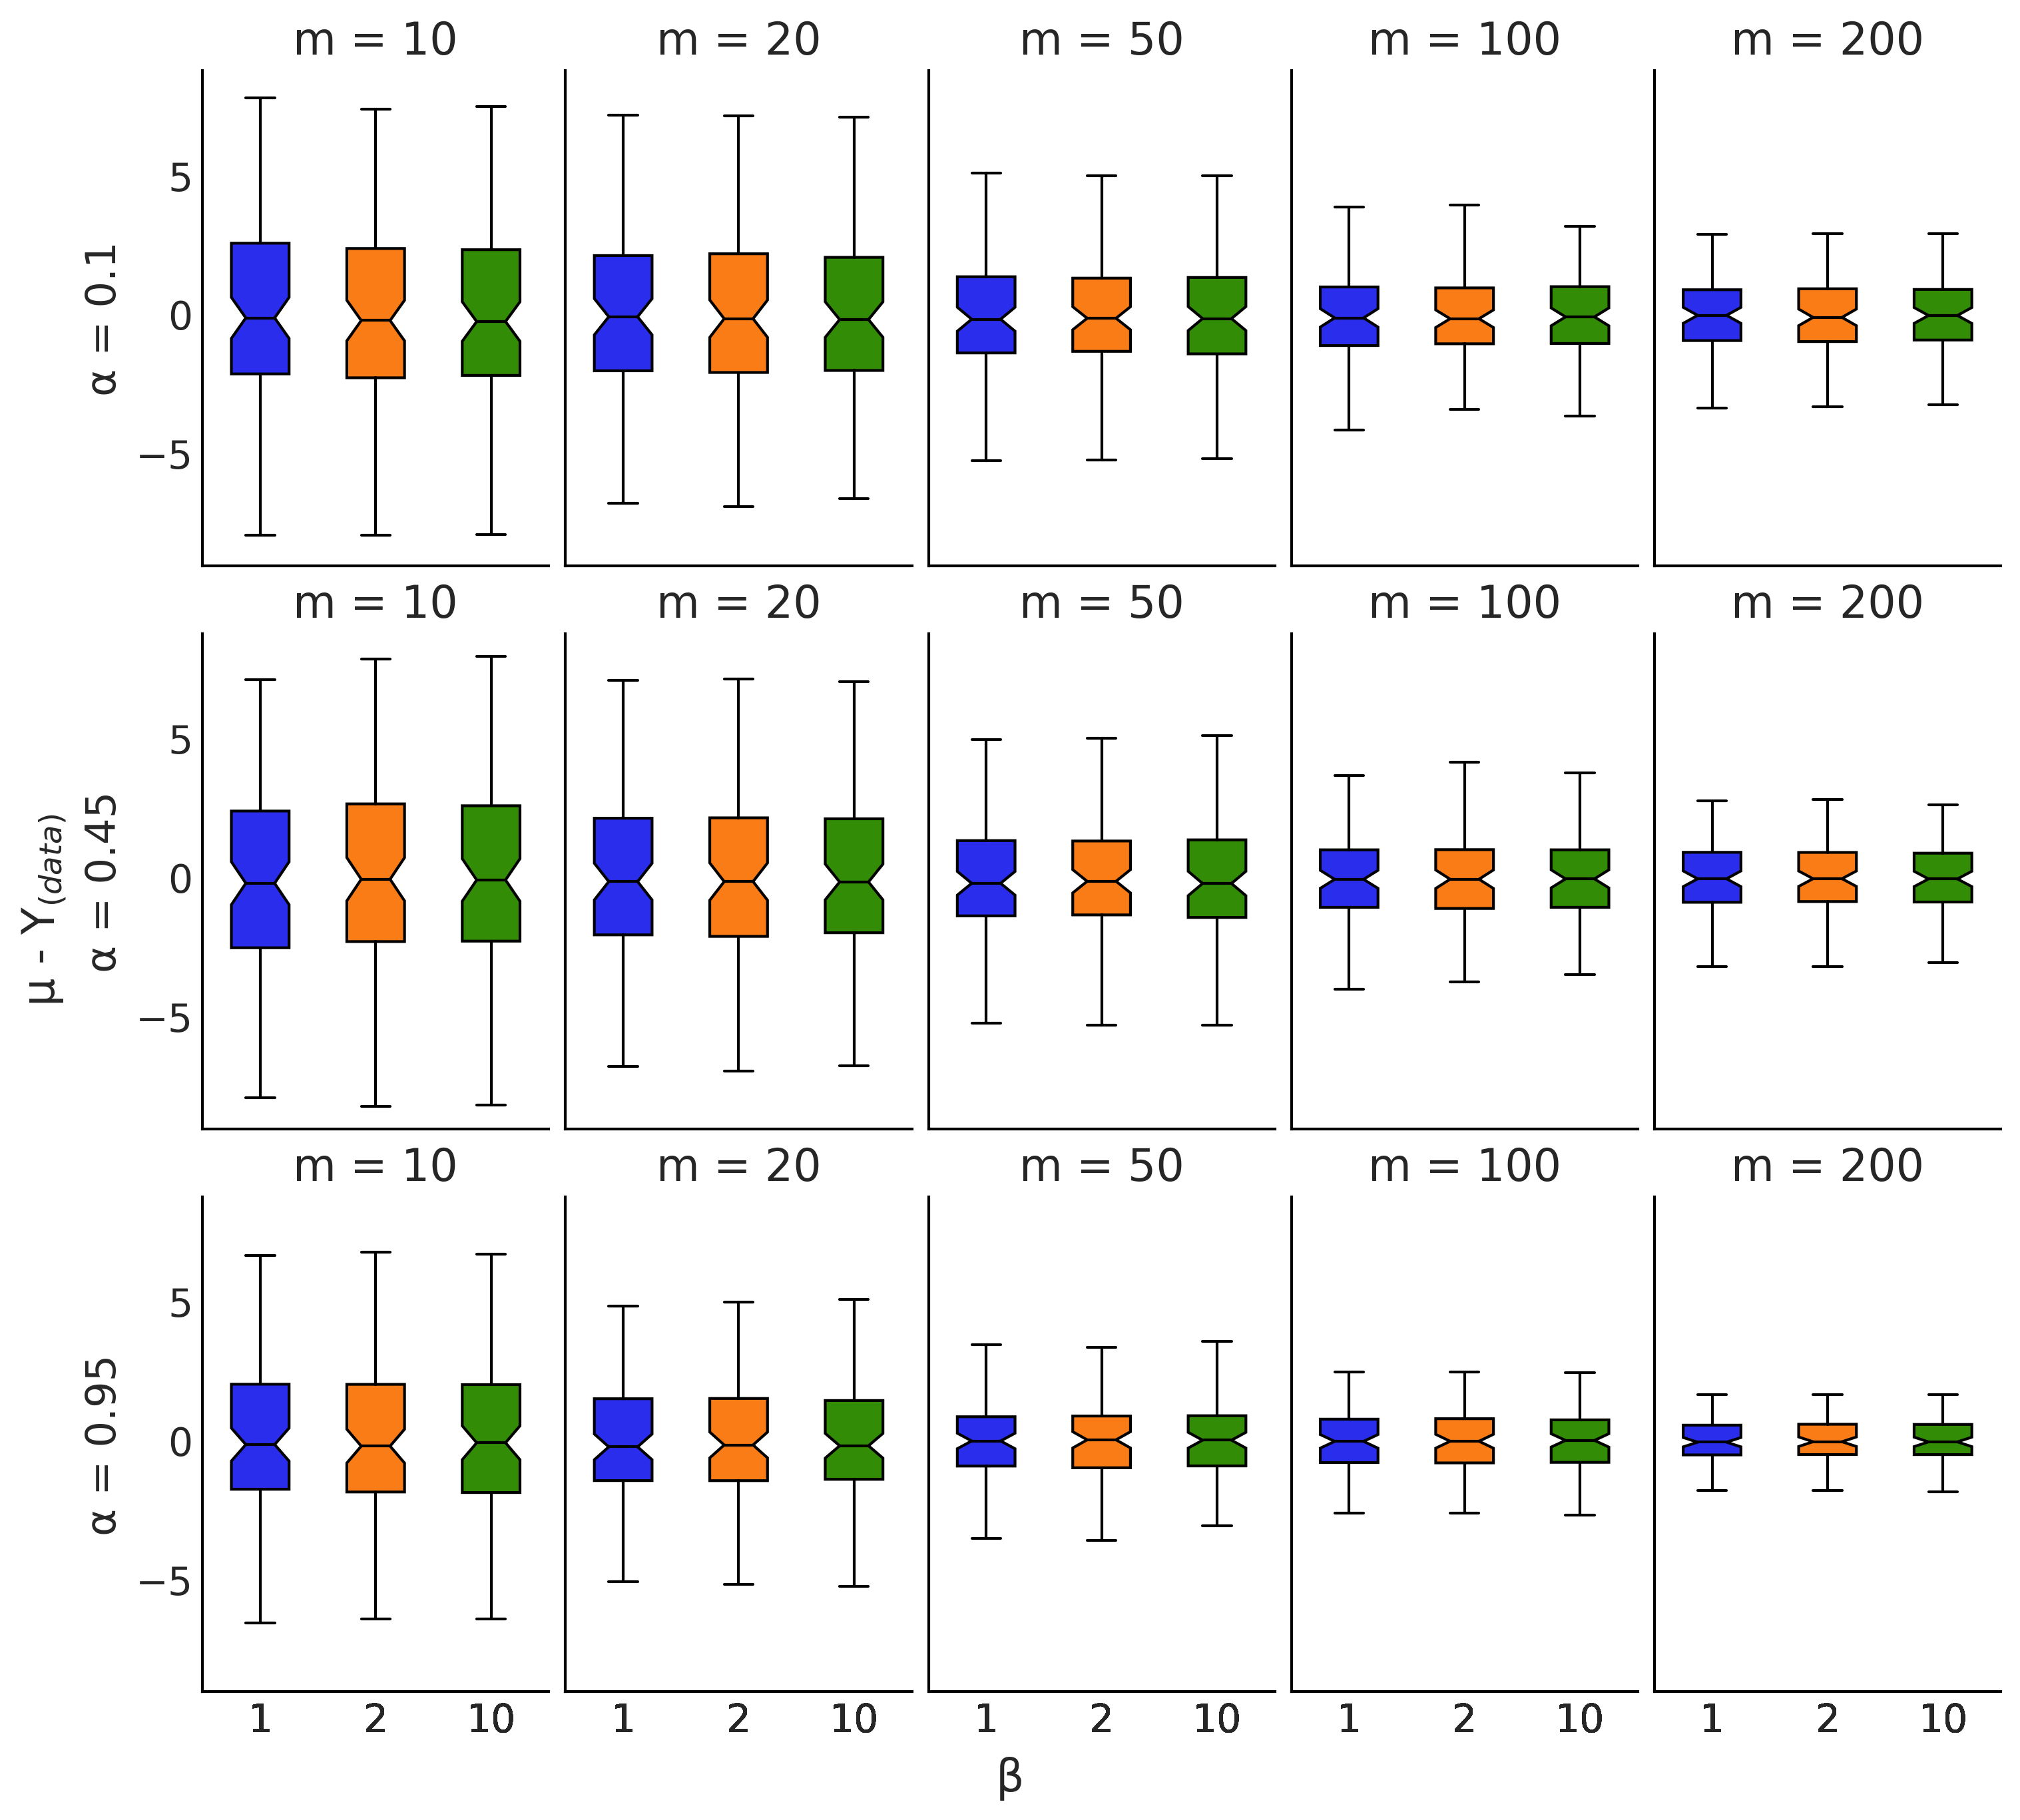

In [6]:
fig, axes = plt.subplots(
    len(alphas), len(trees), figsize=(10, 9), sharey=True, sharex=True
)

axes = axes.ravel()

i = 0
for alpha in alphas:
    for m in trees:
        ax = axes[i]
        means = [
            idatas_at[str(m)][str(alpha)][str(beta)]["posterior"]["μ"].mean(
                ("chain", "draw")
            )
            - Y
            for beta in betas
        ]
        box = ax.boxplot(
            means,
            notch=True,
            patch_artist=True,
            widths=0.5,
            labels=betas,
            showfliers=False,
            medianprops=dict(color="k"),
        )
        for patch, color in zip(box["boxes"], ["C0", "C1", "C2"]):
            patch.set_facecolor(color)
            ax.set_title(f"m = {m}")
        i += 1

axes[0].set_ylabel("α = 0.1")
axes[5].set_ylabel("α = 0.45")
axes[10].set_ylabel("α = 0.95")
fig.supxlabel(r"β", fontsize=16)
fig.supylabel(r"μ - Y$_{(data)}$", fontsize=16)

plt.savefig("boxplots_friedman_i2.png")

## PSIS-LOO-CV

In [7]:
model_compare = az.compare(
    {
        "m10": idatas_at["10"]["0.95"]["2"],
        "m20": idatas_at["20"]["0.95"]["2"],
        "m50": idatas_at["50"]["0.95"]["2"],
        "m100": idatas_at["100"]["0.95"]["2"],
        "m200": idatas_at["200"]["0.95"]["2"],
    }
)

/home/miriana/anaconda3/envs/bart-experiments/lib/python3.9/site-packages/arviz/stats/stats.py:802: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/home/miriana/anaconda3/envs/bart-experiments/lib/python3.9/site-packages/arviz/stats/stats.py:802: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/home/miriana/anacon

In [8]:
model_compare

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
m200,0,-186.810008,44.176548,0.000000,1.000000e+00,9.113871,0.000000,True,log
m100,1,-210.121039,39.659151,23.311031,2.981448e-12,9.414149,1.501187,True,log
m50,2,-232.509839,37.293610,45.699831,9.350853e-13,8.825466,2.971023,True,log
m20,3,-255.057344,31.503508,68.247336,2.831624e-13,8.079997,5.047785,True,log
m10,4,-269.728858,27.228096,82.918850,0.000000e+00,7.321168,6.684781,True,log


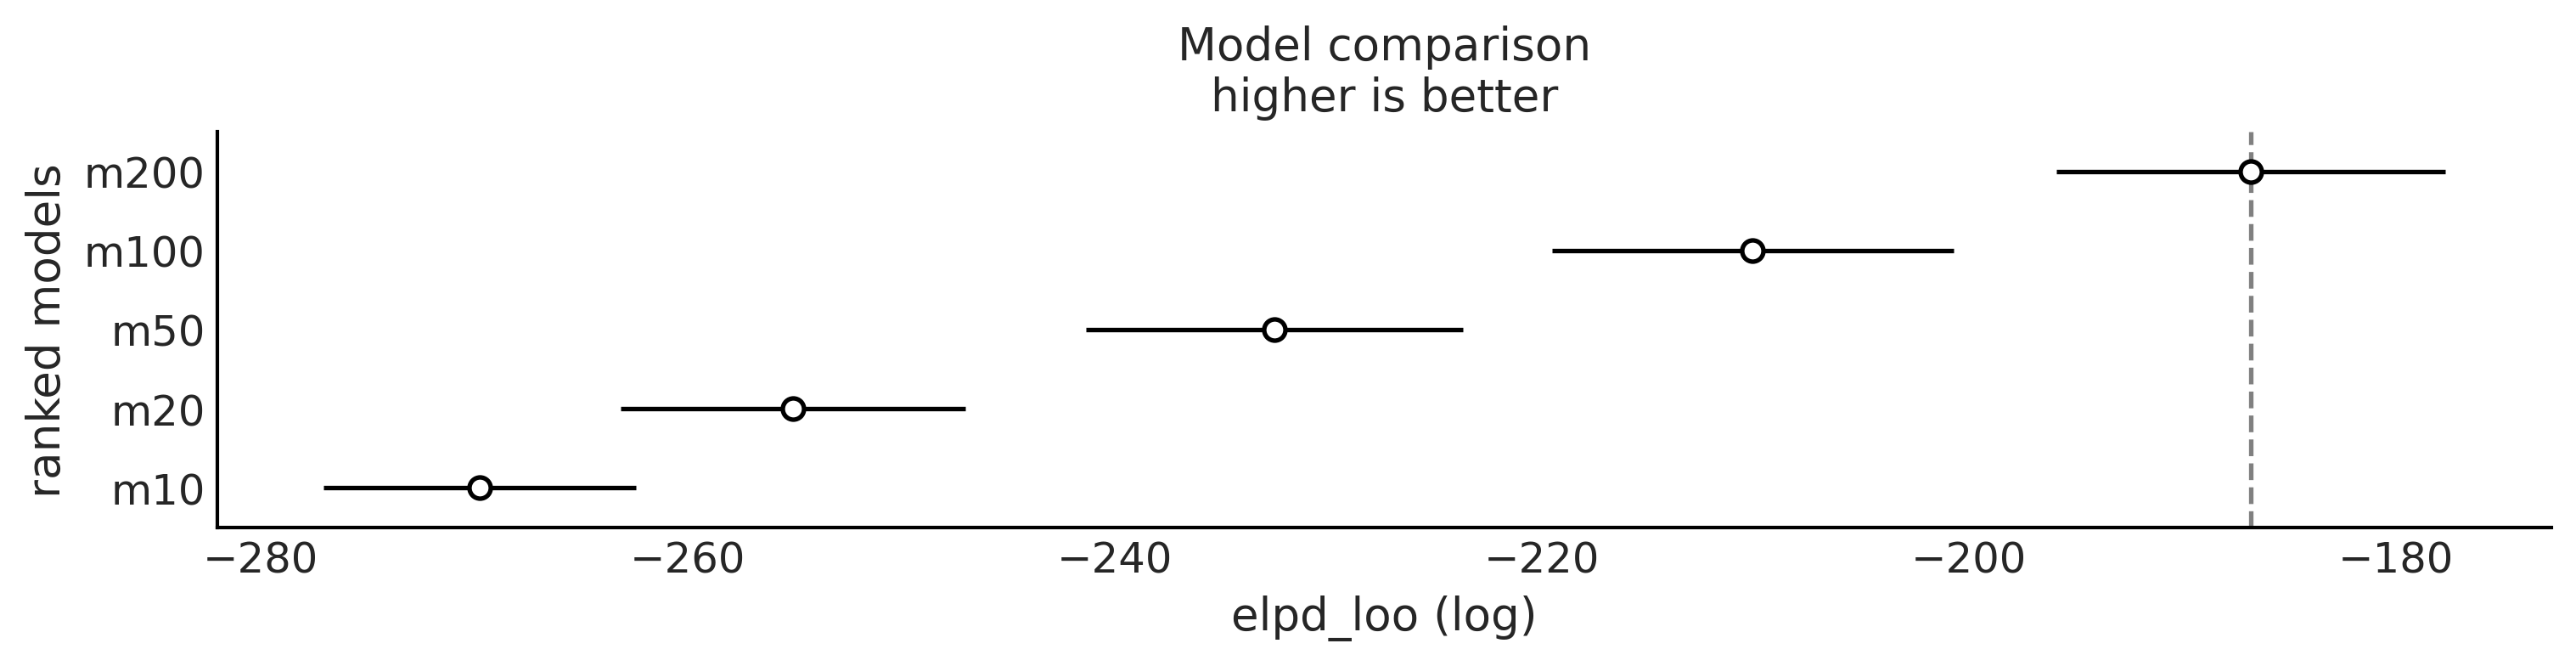

In [9]:
ax = az.plot_compare(
    model_compare,
    plot_ic_diff=False,
    insample_dev=False,
    figsize=(10, 2.5),
    legend=False,
)

plt.savefig("loo_friedman_i2.png")

## Tree extraction  

In [10]:
trees_length = {
    "10": {
        "0.1": {"1": {}, "2": {}, "10": {}},
        "0.45": {"1": {}, "2": {}, "10": {}},
        "0.95": {"1": {}, "2": {}, "10": {}},
    },
    "20": {
        "0.1": {"1": {}, "2": {}, "10": {}},
        "0.45": {"1": {}, "2": {}, "10": {}},
        "0.95": {"1": {}, "2": {}, "10": {}},
    },
    "50": {
        "0.1": {"1": {}, "2": {}, "10": {}},
        "0.45": {"1": {}, "2": {}, "10": {}},
        "0.95": {"1": {}, "2": {}, "10": {}},
    },
    "100": {
        "0.1": {"1": {}, "2": {}, "10": {}},
        "0.45": {"1": {}, "2": {}, "10": {}},
        "0.95": {"1": {}, "2": {}, "10": {}},
    },
    "200": {
        "0.1": {"1": {}, "2": {}, "10": {}},
        "0.45": {"1": {}, "2": {}, "10": {}},
        "0.95": {"1": {}, "2": {}, "10": {}},
    },
}

In [11]:
for m in trees:
    for alpha in alphas:
        for beta in betas:
            tmp_list = []
            chain = m_trees[str(m)][str(alpha)][str(beta)]
            for sample in chain:
                for trees_s in sample:
                    for tree_t in trees_s:
                        index = max(tree_t.tree_structure.keys())
                        tmp_list.append(pmb.tree.get_depth(index))
            trees_length[f"{m}"][f"{alpha}"][f"{beta}"] = pd.Series(tmp_list)

In [12]:
# Trees' depth probabilities based on alpha values
prob_alphas_betas = {
    "0.1": {"1": {}, "2": {}, "10": {}},
    "0.45": {"1": {}, "2": {}, "10": {}},
    "0.95": {"1": {}, "2": {}, "10": {}},
}
for alpha in alphas:
    for beta in betas:
        q = compute_prior_probability(alpha, beta)
        p = 1 - np.array(q)
        p = p / p.sum()
        prob_alphas_betas[f"{alpha}"][f"{beta}"] = p

### Frequency of trees depths

In [13]:
colors = ["C0", "C1", "C2"]
wd = 0.33
wd_lst = [0, wd, wd * 2]

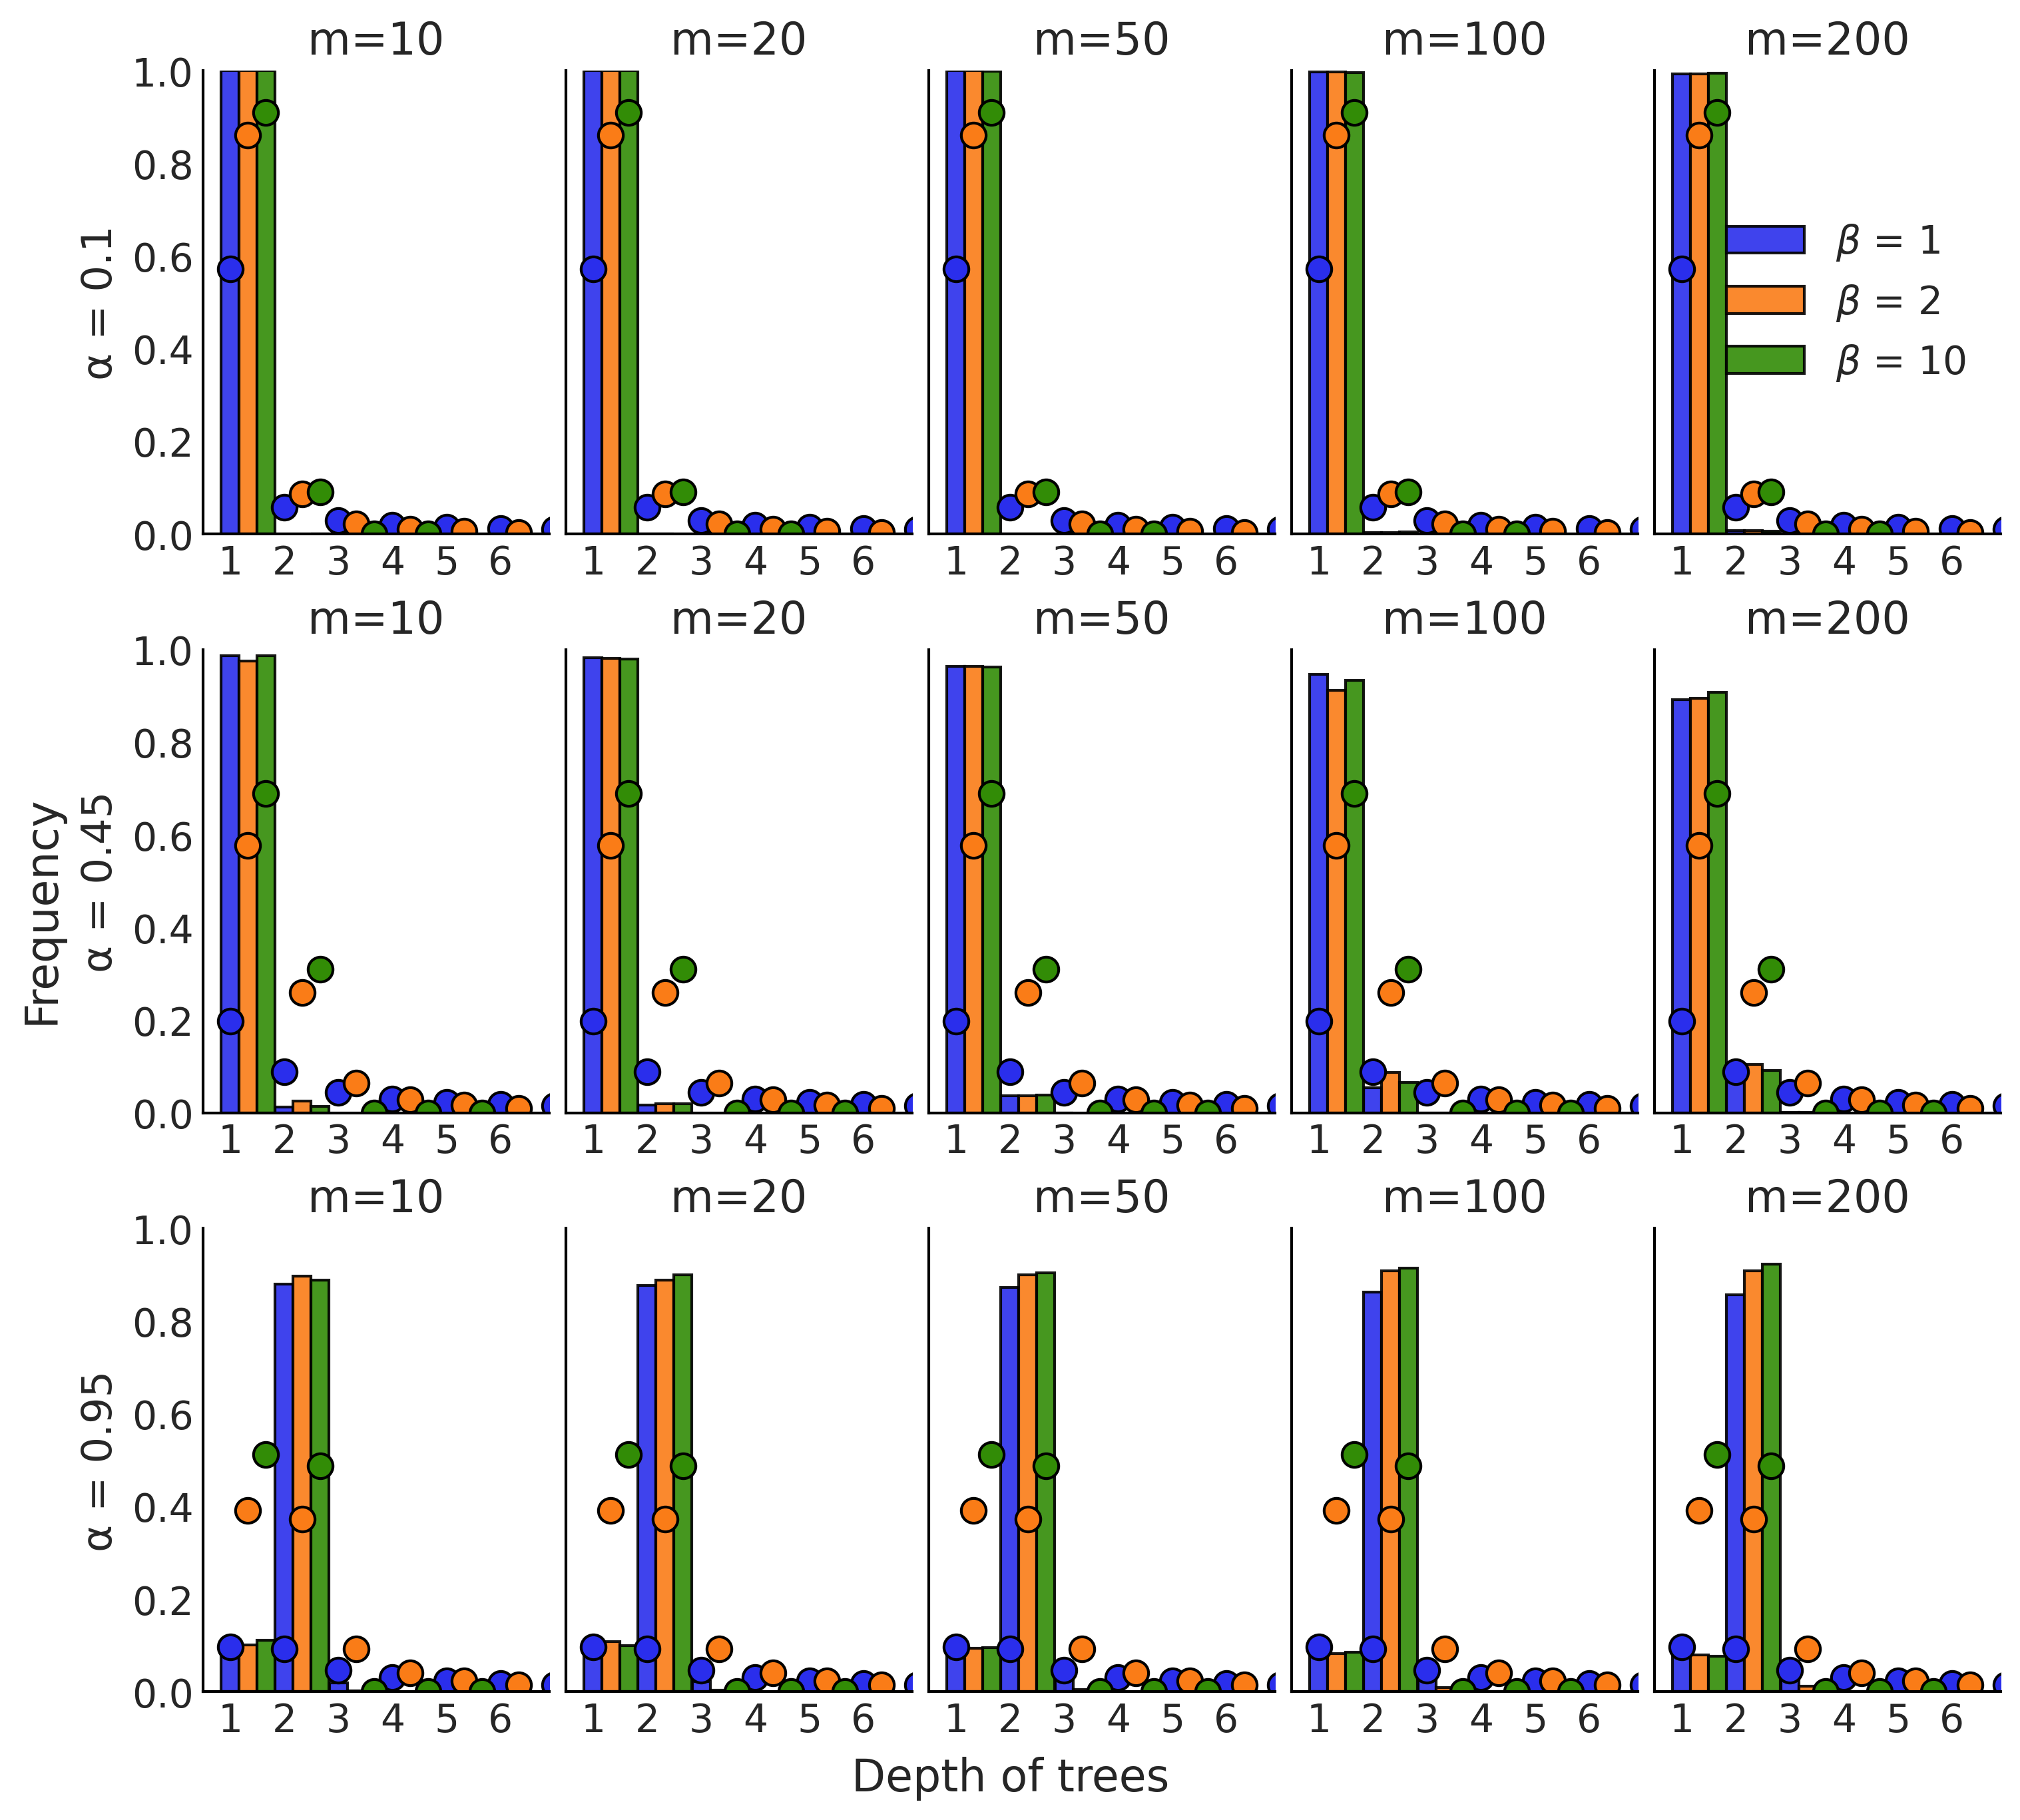

In [14]:
# All frequencies in one plot
fig, axes = plt.subplots(len(alphas), len(trees), figsize=(10, 9), sharey=True)

axes = axes.ravel()

i = 0
for alpha in alphas:
    for m in trees:
        ax = axes[i]
        for j, beta in enumerate(betas):
            # Trees Depth Frequencies
            frequency = (
                trees_length[f"{m}"][f"{alpha}"][f"{beta}"]
                .value_counts(normalize=True)
                .sort_index(ascending=True)
            )
            ax.bar(
                frequency.index + wd_lst[j],
                frequency.values,
                color=f"C{j}",
                width=wd,
                edgecolor="k",
                alpha=0.9,
                label=rf"$\beta$ = {beta}",
            )
            # Probabilities
            x = (
                np.array(range(1, len(prob_alphas_betas[f"{alpha}"][f"{beta}"]) + 1))
                + wd_lst[j]
            )
            ax.scatter(
                x,
                prob_alphas_betas[f"{alpha}"][f"{beta}"],
                facecolor=f"C{j}",
                edgecolor="k",
                marker="o",
                s=80,
                zorder=2,
            )
        i += 1

        major_ticks = np.arange(0, 7, 1)
        ax.set_xticks(major_ticks)
        ax.set_ylim(0, 1)
        ax.set_xlim(0.5, 6.9)
        ax.set_title(f"m={m}")

axes[4].legend()
axes[0].set_ylabel("α = 0.1")
axes[5].set_ylabel("α = 0.45")
axes[10].set_ylabel("α = 0.95")
fig.supylabel("Frequency", fontsize=16)
fig.supxlabel("Depth of trees", fontsize=16)

plt.savefig("friedman_i2_hist.png");